In [3]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
from pylab import *
import os
from HD_Model_NEW.HD_DataLoader import *

In [4]:
dir_data = os.path.join(os.getcwd(), 'HD_Model_NEW', 'HD_data')
HD_object = HD(data_path=dir_data)
data = HD_object.generate_database()

---------------------------------------------------------
Generating database for HD's


In [5]:
# this function selects the data from the database
sensor_data = []
def select_data(testnr, sensor, selection):
    sensor_data = data[testnr][sensor][selection]
    return sensor_data

In [19]:
# this is a function to make the fft data
def make_fft(plot, fs):
    X = fft(plot)
    N = len(X)
    nfft = np.arange(N)
    T = N/fs
    freq = nfft/T
    X= np.abs(X)
    #X = np.hanning(nfft)*X
    X_db = 20*np.log10(X)

    return freq, X_db

In [7]:
def get_concat_sensor(sensor, selection):

    normal = []
    faulty = []
    concat_normal = []
    concat_faulty = []
    if sensor == 'Microphone':
        for testnr in data:
            if data[testnr]['attributes']['HD_status']== 0: #it is normal HD
                normal.append((data[testnr][sensor][selection][:,0]))
            elif data[testnr]['attributes']['HD_status']== 1:
                faulty.append((data[testnr][sensor][selection][:,0]))
            else:
                print("Undefined state")
        
        normal = np.array(normal)
        faulty = np.array(faulty)
            
        for i in range(len(normal)):
            concat_normal = np.concatenate((concat_normal, normal[i]))
        for i in range(len(faulty)):
            concat_faulty = np.concatenate((concat_faulty, faulty[i]))

    if sensor == 'Vibration':
        for testnr in data:
            if data[testnr]['attributes']['HD_status']== 0:
                normal.append((data[testnr][sensor][selection]))
            elif data[testnr]['attributes']['HD_status']== 1:
                faulty.append((data[testnr][sensor][selection]))
            else:
                print("Undefined state")

        for i in range(len(normal)):
            concat_normal = np.concatenate((concat_normal, normal[i]))
        for i in range(len(faulty)):
            concat_faulty = np.concatenate((concat_faulty, faulty[i]))

    if sensor == 'dSpace':
        for testnr in data:
            if data[testnr]['attributes']['HD_status']== 0: #it is normal HD
                normal.append((data[testnr][sensor][selection]))
            elif data[testnr]['attributes']['HD_status']== 1:
                faulty.append((data[testnr][sensor][selection]))
            else:
                print("Undefined state")
        
        for i in range(len(normal)):
            concat_normal = np.concatenate((concat_normal, normal[i]))
            
        for i in range(len(faulty)):
            concat_faulty = np.concatenate((concat_faulty, faulty[i]))    


    return concat_normal, concat_faulty

In [8]:
def plot_mic_data(plot, fs, plottitle):
    freq, X_db = make_fft(plot, fs)

    plt.figure(figsize = (10, 4))
    #title for both subplots
    # HDstatus = data[testnr]['attributes']['HD_status']
    plt.suptitle(plottitle)
    plt.subplot(121)
    plt.semilogx(freq, X_db, 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Magnitude (dB)')
    xlim((20, 20000))
    plt.grid()

    plt.subplot(122)
    plt.plot(plot, 'r')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()


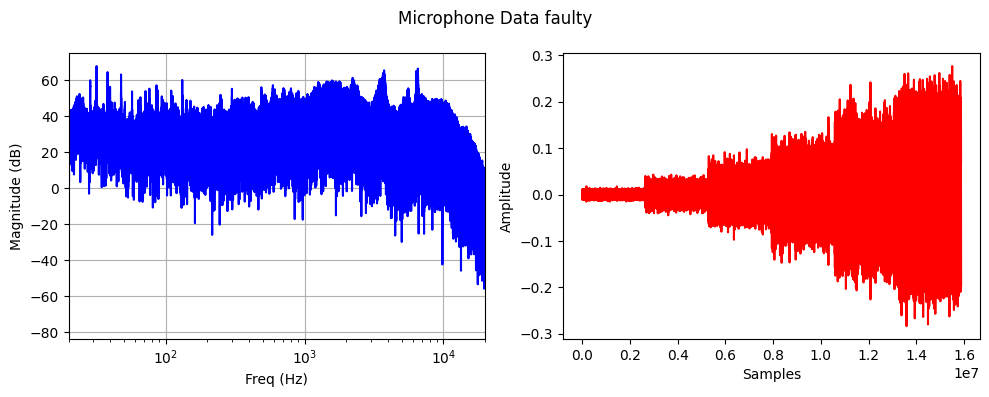

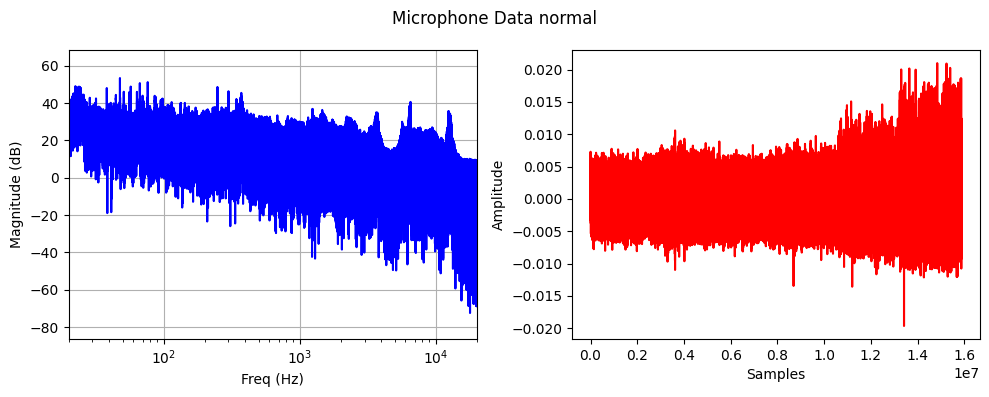

In [9]:
# Plot normal and faulty concatenated data
sensortype = 'Microphone'
selection = 'Data'
fs = 44100
concat_normal, concat_faulty = get_concat_sensor('Microphone', 'Data')
plottitle1 = sensortype + ' ' +  selection  + ' '  + 'faulty'
plottitle2 = sensortype + ' ' +  selection  + ' '  + 'normal'
plot_mic_data(concat_faulty,fs, plottitle1)
plot_mic_data(concat_normal,fs, plottitle2)




In [10]:
def plot_vibration_data(plot, fs, plottitle):
    freq, X_db = make_fft(plot, fs)
    
    plt.figure(figsize = (10, 4))
    #title for both subplots
    #HDstatus = data[testnr]['attributes']['HD_status']
    plt.suptitle(plottitle)
    plt.subplot(121)
    plt.semilogx(freq, X_db, 'b')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Magnitude (dB)')
    xlim((0.0001, 0.4))
    plt.grid()

    plt.subplot(122)
    plt.plot(plot, 'r')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

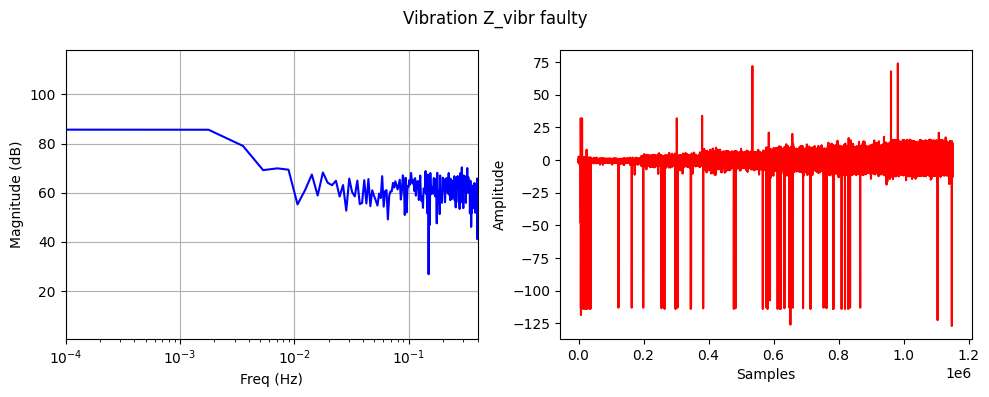

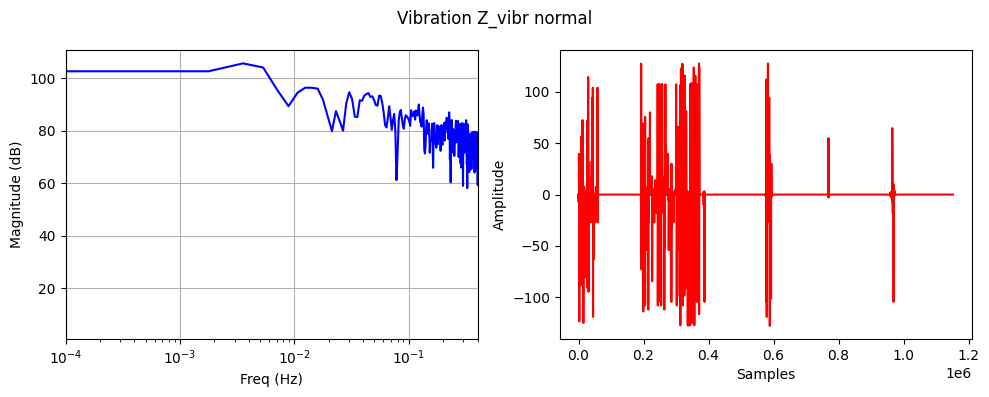

In [11]:
# plot the concatenated vibration data
sensortype = 'Vibration'
selection = 'Z_vibr'
fs = 2048
concat_normal, concat_faulty = get_concat_sensor(sensortype, selection)
plottitle1 = sensortype + ' ' +  selection  + ' '  + 'faulty'
plottitle2 = sensortype + ' ' +  selection  + ' '  + 'normal'
plot_vibration_data(concat_faulty, fs, plottitle1)
plot_vibration_data(concat_normal, fs, plottitle2)

In [12]:
def plot_dspace_data(plot, fs, plottitle):

    freq, X_db = make_fft(plot, fs)
    
    plt.figure(figsize = (10, 4))
    plt.suptitle(plottitle)
    plt.subplot(121)
    plt.semilogx(freq, X_db, 'b')
    xlim((0.0001, 0.4))
    plt.xlabel('Freq (Hz)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(122)
    plt.plot(plot, 'r')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

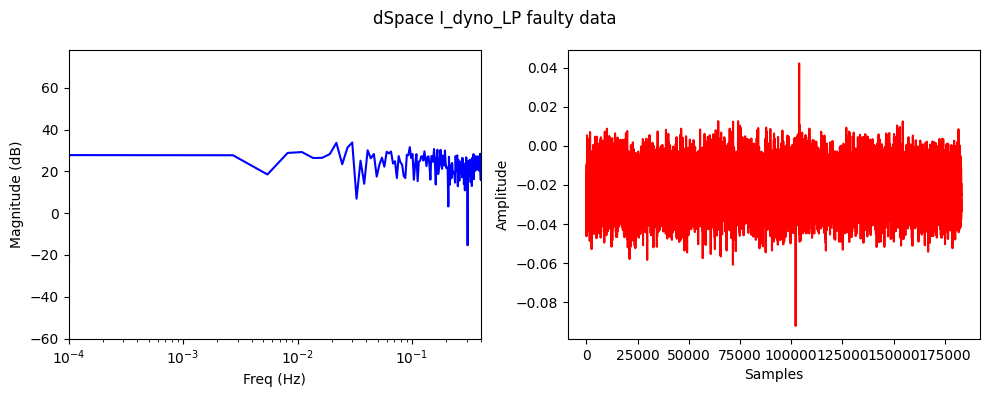

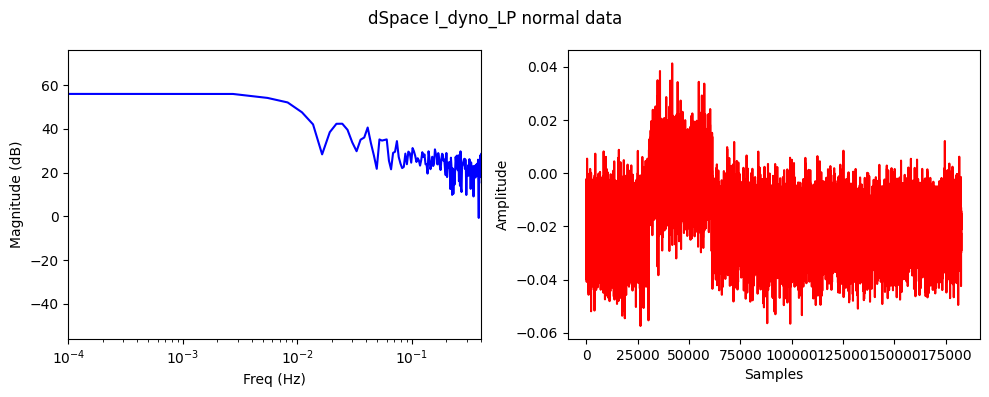

In [13]:
sensortype = 'dSpace'
selection = 'I_dyno_LP'
fs = 500
concat_normal, concat_faulty = get_concat_sensor(sensortype, selection)
plottitle1 = sensortype + ' ' +  selection  + ' '  + 'faulty data'
plottitle2 = sensortype + ' ' +  selection  + ' '  + 'normal data'
plot_dspace_data(concat_faulty, fs, plottitle1)
plot_dspace_data(concat_normal, fs, plottitle2)

From here the FFT data is plotted over each other for better comparison of normal and faulty FFT's, also a grid is added

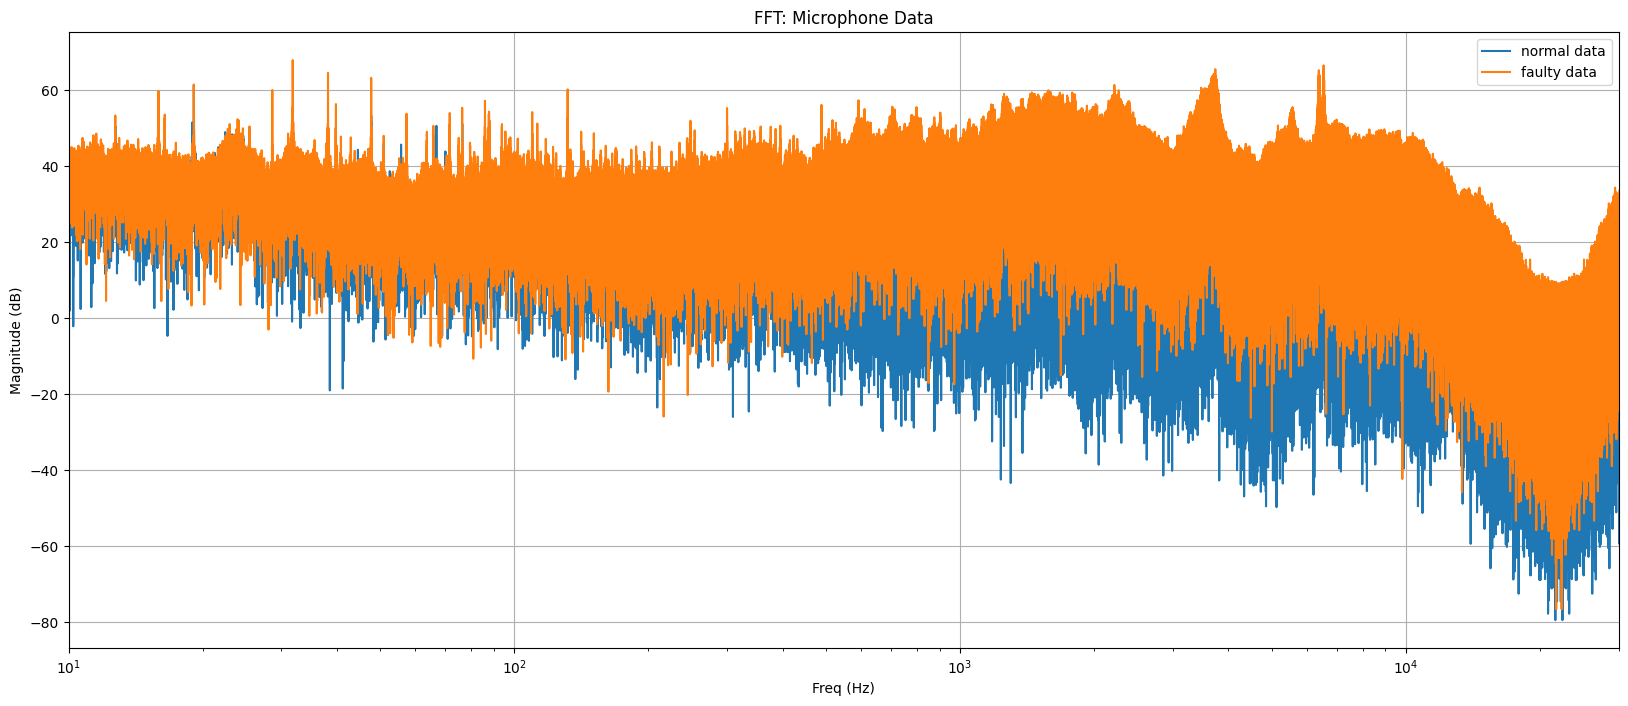

In [14]:
sensortype = 'Microphone'
selection = 'Data'
fs = 44100

concat_normal, concat_faulty = get_concat_sensor(sensortype, selection)
freq1, X_db1 = make_fft(concat_normal, fs)
freq2, X_db2 = make_fft(concat_faulty, fs)

plt.figure(figsize = (20, 8))
plt.semilogx(freq1, X_db1, label = "normal data")
plt.semilogx(freq2, X_db2, label = "faulty data")
plt.xlabel('Freq (Hz)')
plt.ylabel('Magnitude (dB)')
xlim((10, 30000))
plt.legend()
plt.grid()
plt.title('FFT:' + ' ' + sensortype + ' ' +  selection)
plt.show()

# 1: use a hanning window
# 2: plot the mic data in the domain of 20-20kHz
# 3: plot the vibration data in the domain of ~
# 4: motivate the inputs for the nearal network by using the fft data


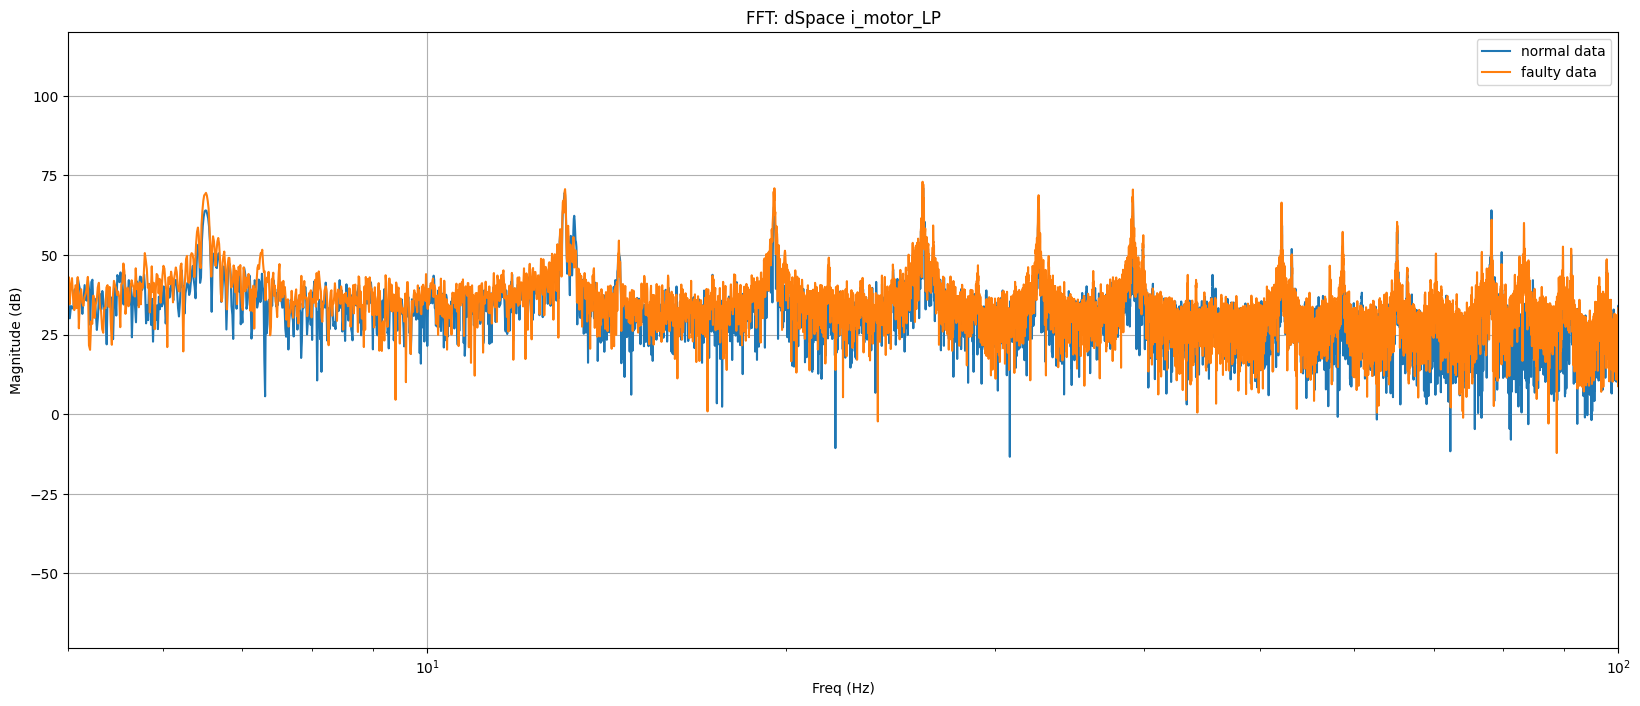

In [15]:
sensortype = 'dSpace'
# if you want the motor speed set selection to 'speed_motor' in stead of 'w_out'
selection = 'i_motor_LP'
fs = 2048


concat_normal, concat_faulty = get_concat_sensor(sensortype, selection)
freq1, X_db1 = make_fft(concat_normal, fs)
freq2, X_db2 = make_fft(concat_faulty, fs)

plt.figure(figsize = (20, 8))
plt.semilogx(freq1, X_db1, label = "normal data")
plt.semilogx(freq2, X_db2, label = "faulty data")
plt.xlabel('Freq (Hz)')
plt.ylabel('Magnitude (dB)')
xlim((5, 100))
plt.legend()
plt.grid()
plt.title('FFT:' + ' ' + sensortype + ' ' +  selection)
plt.show()

# 1: use a hanning window
# 2: plot the mic data in the domain of 20-20kHz
# 3: motivate the inputs for the neural network by using the fft data

In [16]:
data[1]['dSpace']['w_out']

KeyError: 'w_out'